# Dialysis Analysis: Understanding Dialysis Facility Rating Components

### Author: Benjamin Mardin 
### Published: 2025-06-04

#### data sourced from https://data.cms.gov/provider-data/dataset/23ew-n7w9#overview

In [1]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

## Step 1: business understanding

as I am unable to contact dataset owners, for me to gain business understanding I read through the data dictionary associated with the dataset: https://data.cms.gov/provider-data/sites/default/files/data_dictionaries/dialysis/DF_Data_Dictionary.pdf 

## Step 2: data understanding 

In [2]:
## ingest data
# originally from https://data.cms.gov/provider-data/dataset/23ew-n7w9#overview
# Last Modified: March 24, 2025
# Released: April 23, 2025
# Public Access Level: public
dfc_f = pd.read_csv('DFC_FACILITY.csv')

### exploratory data analysis  

#### Business Question: How many Dialysis Facilities are registered with Medicare? 
we can check the total number of facilities in the data to understand what is the population size we are dealing with


this can be useful in determining the total potential market for a new product or service that targets dialysis patients or facilities 

In [3]:
# check shape of data
dfc_f.shape

(7556, 142)

7556 Dialysis Facilities registered as of the last data publication (2025-03-24)

In [4]:
# how many 5 star facilities are there in the US? 

# filter for observations with 5 stars
five_star = dfc_f[dfc_f['Five Star'] == 5]
print(f'there are {len(five_star)} five-star facilities in the US')

# how are the 5 star facilities distributed in the states?
five_star_states = five_star.groupby('State')['CMS Certification Number (CCN)'].count().reset_index()

# which state have the fewest/none? 
# to get a list of all states and their total facilities, count from the original dataframe
# then merge with the count of 5 star facilities in each state
# rename columns as needed
# order by # of 5 star and total facilities
facility_counts = dfc_f.groupby(['State'])['CMS Certification Number (CCN)'].count().reset_index() \
     .merge(five_star_states, how='left', on='State') \
     .rename(columns={'CMS Certification Number (CCN)_x':'Total Dialysis Facilities', 
                      'CMS Certification Number (CCN)_y':'Five-Star Dialysis Facilities'}) \
     .fillna(0).astype({'Five-Star Dialysis Facilities': 'int'}) \
     .sort_values(['Five-Star Dialysis Facilities', 'Total Dialysis Facilities']) \
     .reset_index().drop('index', axis=1)
facility_counts

there are 509 five-star facilities in the US


,State,Total Dialysis Facilities,Five-Star Dialysis Facilities
0,AS,2,0
1,MP,3,0
2,GU,5,0
3,VI,5,0
4,VT,8,0
5,ND,16,0
6,MT,17,0
7,DE,34,0
8,WV,41,0
9,PR,50,0


In [5]:
# set notebook to display unlimited rows , because dataset has 100+ features to inspect
pd.set_option('display.max_rows', None)

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html

In [6]:
# describe numeric features
dfc_f.describe().T

,count,mean,std,min,25%,50%,75%,max
CMS Certification Number (CCN),7556.0,329938.206458,203105.542118,12306.00,152578.5000,332639.50,452794.500,852609.00
Network,7556.0,9.687665,4.774670,1.00,6.0000,9.00,14.000,18.00
Five Star,7013.0,2.808071,1.084406,1.00,2.0000,3.00,3.000,5.00
Five Star Data Availability Code,7556.0,19.559291,66.719745,1.00,1.0000,1.00,1.000,261.00
ZIP Code,7556.0,50453.663446,27910.971160,603.00,29464.0000,46024.00,76708.000,99801.00
# of Dialysis Stations,7556.0,17.630360,8.666408,0.00,12.0000,17.00,23.000,80.00
Patient Survival data availability code,7556.0,12.082716,49.204103,1.00,1.0000,1.00,1.000,258.00
Number of Patients included in survival summary,7519.0,275.031121,171.458067,0.00,159.0000,251.00,362.000,3026.00
Mortality Rate (Facility),7185.0,22.191705,5.719884,0.00,18.4000,21.70,25.500,66.70
Mortality Rate: Upper Confidence Limit (97.5%),7185.0,36.122199,9.393332,13.30,30.0000,34.70,40.400,110.60


In [7]:
# the target variable of interest to me is the rating of the clinic
dfc_f['Five Star'].describe()
# 7013 observations with a 5 star rating available 

count    7013.000000
mean        2.808071
std         1.084406
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: Five Star, dtype: float64

In [8]:
# describe categorical features
dfc_f.describe(include='object').T

,count,unique,top,freq
Facility Name,7556,7545,DaVita Garden City Dialysis Center,2
Five Star Date,7556,1,01Jan2020-31Dec2023,7556
Address Line 1,7556,7529,DIALYSIS UNIT,5
Address Line 2,1262,696,Suite 100,50
City/Town,7556,3512,HOUSTON,85
State,7556,56,TX,743
County/Parish,7556,1239,Los Angeles,215
Telephone Number,7556,7504,(787) 292-7979,15
Profit or Non-Profit,7556,2,Profit,6767
Chain Owned,7556,2,Yes,6809


#### Business Question: What States have the most Dialysis Facilities are registered with Medicare? 
we can check the total number of facilities in each state and see which states have the most

this information could be useful in planning which geographies to expand into, if you business is related to medicare & dialysis

In [9]:
dfc_f.groupby('State')['CMS Certification Number (CCN)'].count().sort_values(ascending=False).head(20)
facility_counts.sort_values(['Five-Star Dialysis Facilities', 'Total Dialysis Facilities'], ascending=False).head(20)

,State,Total Dialysis Facilities,Five-Star Dialysis Facilities
55,CA,737,94
54,NY,348,56
53,NJ,189,44
52,TX,743,39
51,MA,85,20
50,PA,306,19
49,VA,208,16
48,MN,115,14
47,NC,252,13
46,MI,221,12


In [10]:
# inspect feature data types
dfc_f.dtypes

CMS Certification Number (CCN)                                                                                  int64
Network                                                                                                         int64
Facility Name                                                                                                  object
Five Star Date                                                                                                 object
Five Star                                                                                                     float64
Five Star Data Availability Code                                                                                int64
Address Line 1                                                                                                 object
Address Line 2                                                                                                 object
City/Town                                               

In [11]:
# I was interested in covid vaccination data, and before removing na rows I wanted to see how much data would be impacted
dfc_f['Healthcare worker COVID-19 vaccination adherence percentage'].isna().sum()

890

In [12]:
# check which numeric features are correlated with the target (5 star rating)
abs(dfc_f.corr()['Five Star']).sort_values(ascending=False).head(20)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

# to avoid collinearity I will only use some of the following features, along with some categorical features

Percentage of pediatric PD patients with Kt/V>=1.8             1.000000
Five Star                                                      1.000000
Percentage of pediatric HD patients with nPCR                  0.859072
Fistula Rate (Facility)                                        0.613710
Percentage of Adult patients with long term catheter in use    0.583659
Fistula Rate: Upper Confidence Limit (97.5%)                   0.529342
Standardized First Kidney Transplant Waitlist Ratio            0.524941
Fistula Rate: Lower Confidence Limit (2.5%)                    0.519342
95% C.I. (upper limit) for SWR                                 0.505970
95% C.I. (lower limit) for SWR                                 0.468157
Percentage of Prevalent Patients Waitlisted                    0.462024
Hospitalization Rate (Facility)                                0.431088
95% C.I. (lower limit) for PPPW                                0.424181
Hospitalization Rate: Lower Confidence Limit (2.5%)            0

In [13]:
### data availability: some data is provided with a data availability code
# remove any rows with data availability code <> 1 
preds_with_availability = ['Fistula Rate (Facility)',
              'Hospitalization Rate (Facility)',
              'Mortality Rate (Facility)',
              'Readmission Rate (Facility)',
              'Chain Owned', 
              'Healthcare worker COVID-19 vaccination adherence percentage',
              'Profit or Non-Profit',
              'Patient Hospitalization data availability Code',
              'Patient Hospital Readmission data availability Code',
              'Patient Transfusion data availability Code',
              'Fistula data availability code',
              'Five Star'
              ]

availability = dfc_f[preds_with_availability].copy()
for name in preds_with_availability:
    if 'data availability' in name:
        availability = availability.drop(availability[~availability[name].isin([1])].index)

for name in preds_with_availability:
    if 'data availability' in name:
        print(name, availability[name].unique())
print(len(availability))

Patient Hospitalization data availability Code [1]
Patient Hospital Readmission data availability Code [1]
Patient Transfusion data availability Code [1]
Fistula data availability code [1]
4925


## Step 3: data preparation (and data understanding continued)

In [14]:
# I ended up with 6 numeric and 3 categorical features
# list of predictors 
predictors = [
              'Fistula Rate (Facility)',
              'Hospitalization Rate (Facility)',
              'Mortality Rate (Facility)',
              'Readmission Rate (Facility)',
              'Chain Owned', 
              'Healthcare worker COVID-19 vaccination adherence percentage',
              'Profit or Non-Profit'
              ]
# some of the features I tried and discarded were:
#              'Percentage of pediatric PD patients with Kt/V>=1.8'
#              'Transfusion Rate (Facility)',
#              'Standardized First Kidney Transplant Waitlist Ratio',
#              'Percentage of Prevalent Patients Waitlisted',
#              'Percentage of Adult patients with long term catheter in use',
#              'Percentage of pediatric HD patients with nPCR'
#              'Offers home hemodialysis training',
#              'Patient Survival Category Text',
#              'Patient hospitalization category text',
#              'Patient Hospital Readmission Category'
# I checked different combinations of features, eventually resulting in the selection above


# the feature selection process I used was:  
#    create dfc_subset, see how many observations remain: if too many dropped, do not include that feature
#    if enough observations remain: get_dummies to encode categorical variables 
#    create correlation matrix & plot it as a heatmap to assess for collinearity
#    if features had high correlation then drop one of the features and begin again
#    if no features had high correlation then make a model , train, test, etc.

# list of column names for predictors & target 
pred_and_target =  predictors.copy()
pred_and_target.append('Five Star')

# focus only on selected predictor & target columns from dfc_f
dfc_subset = availability[pred_and_target].copy()

In [15]:
# confirm how many observations are missing values for the selected predictors
dfc_subset.isna().sum()

Fistula Rate (Facility)                                          0
Hospitalization Rate (Facility)                                  0
Mortality Rate (Facility)                                        1
Readmission Rate (Facility)                                      0
Chain Owned                                                      0
Healthcare worker COVID-19 vaccination adherence percentage    231
Profit or Non-Profit                                             0
Five Star                                                       24
dtype: int64

In [16]:
# dropna from dfc_subset to produce 'data', cleaned data ready to be split into X and y
data = dfc_subset.dropna()
# because the NA represented only ~10% of the data, I simply removed NA rows rather than trying to impute a value

#see how many observations remain: if too many dropped, do not include that feature
data.shape

(4676, 8)

In [17]:
# using dropany with several columns makes us lose ~16% of observations, but it still leaves us with 6300 
# enough to train a model
print(f'{round(100*(1-(len(dfc_f)-len(data))/ len(dfc_f)),3)}% of data kept')

# other models i trained using 1 or 2 additional features ended with better r^2
# but they had so many NA less than 50% of data was kept in the dropna step

61.885% of data kept


In [18]:
# if enough observations remain: get_dummies to encode categorical data as numeric 
dummied_data = pd.get_dummies(data)
dummied_data.head()

,Fistula Rate (Facility),Hospitalization Rate (Facility),Mortality Rate (Facility),Readmission Rate (Facility),Healthcare worker COVID-19 vaccination adherence percentage,Five Star,Chain Owned_No,Chain Owned_Yes,Profit or Non-Profit_Non-profit,Profit or Non-Profit_Profit
1,43.0,139.0,26.0,27.7,0.0,1.0,0,1,0,1
3,34.3,160.1,26.3,23.3,2.0,1.0,0,1,0,1
4,65.3,127.6,25.6,13.1,0.0,3.0,0,1,0,1
6,56.7,186.7,24.3,33.4,0.0,3.0,0,1,0,1
8,56.0,209.2,29.0,35.2,0.0,1.0,0,1,0,1


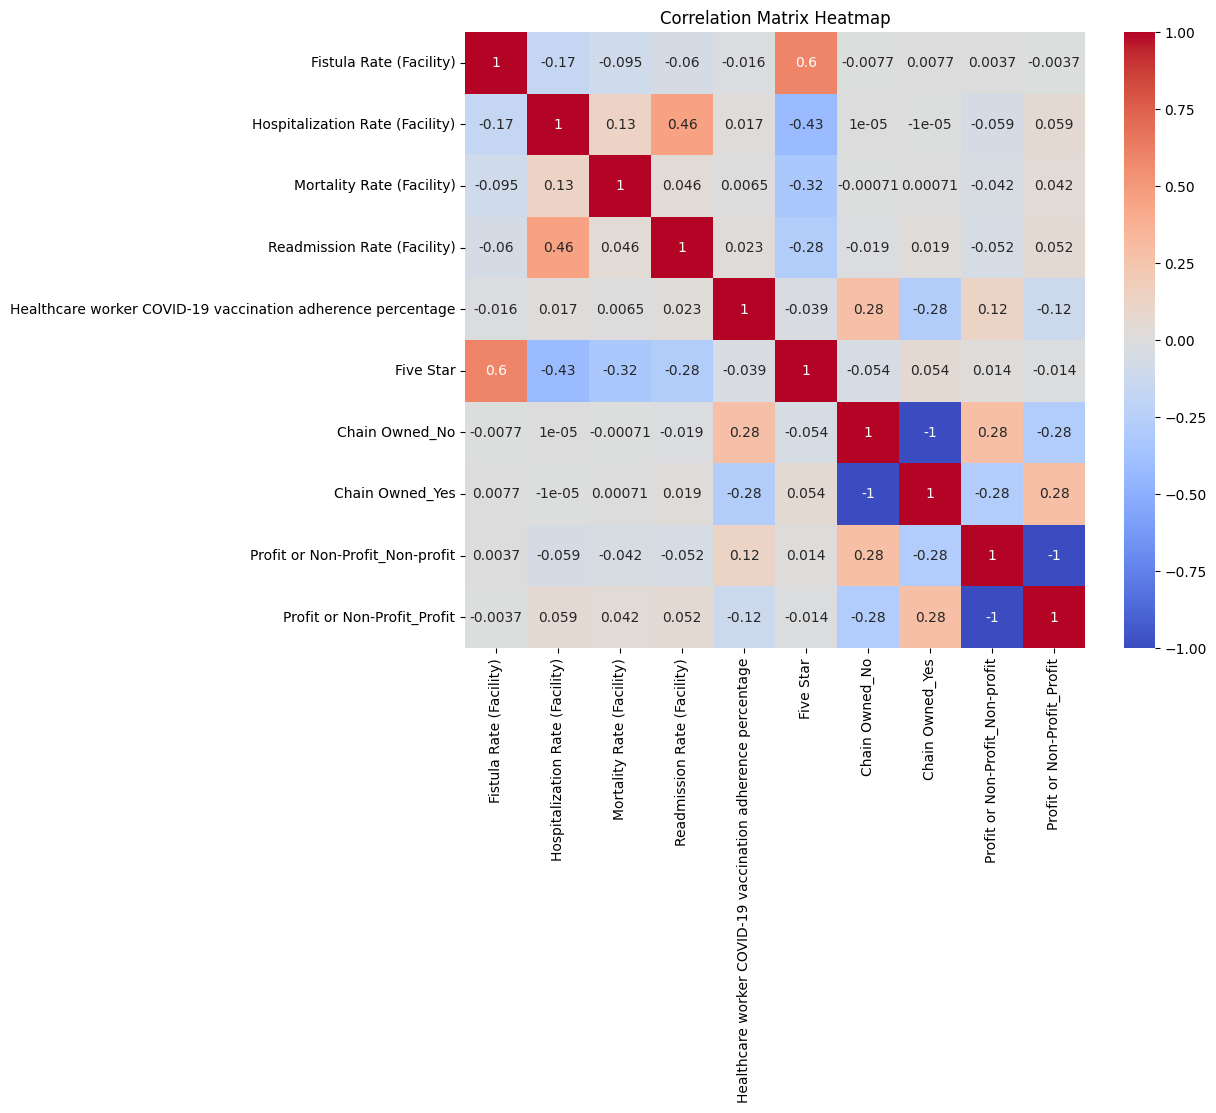

In [19]:
# create correlation matrix 
corr_matrix = dummied_data.corr()

# & plot it as a heatmap to assess for potential collinearity
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# if features had high correlation then drop one of the impacted features and begin again

In [20]:
corr_matrix['Five Star']

Fistula Rate (Facility)                                        0.597910
Hospitalization Rate (Facility)                               -0.427551
Mortality Rate (Facility)                                     -0.320642
Readmission Rate (Facility)                                   -0.276177
Healthcare worker COVID-19 vaccination adherence percentage   -0.038669
Five Star                                                      1.000000
Chain Owned_No                                                -0.054315
Chain Owned_Yes                                                0.054315
Profit or Non-Profit_Non-profit                                0.013745
Profit or Non-Profit_Profit                                   -0.013745
Name: Five Star, dtype: float64

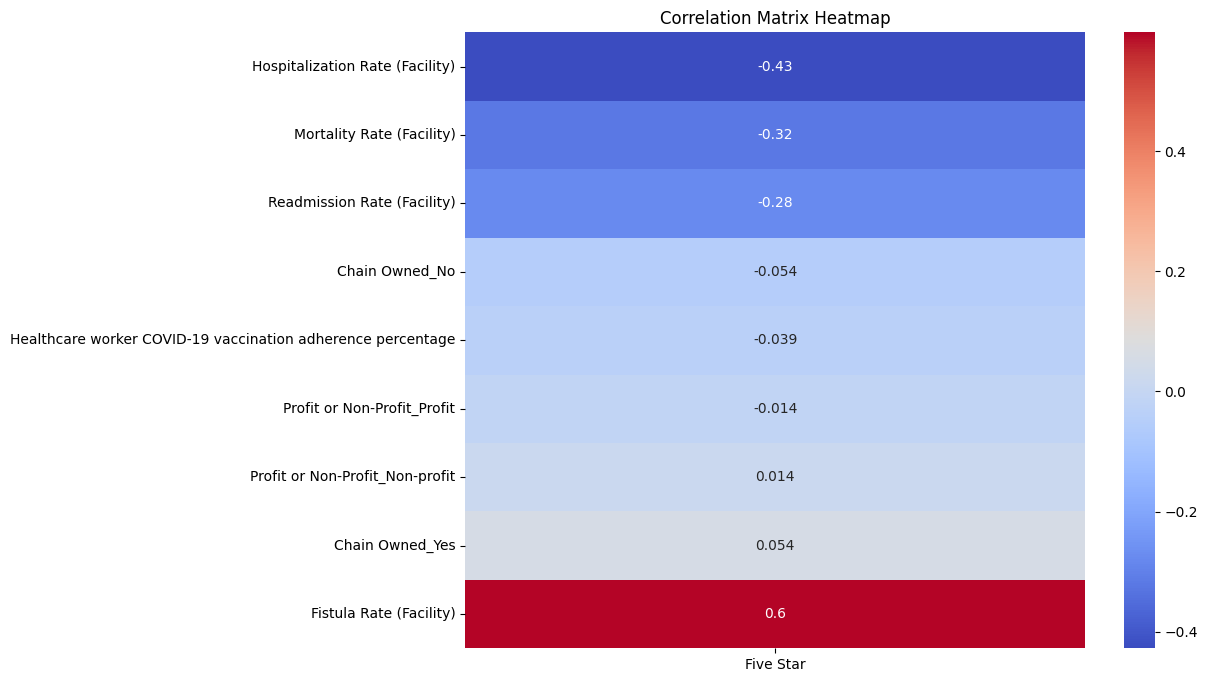

In [21]:
corr_matrix2 = pd.DataFrame(dummied_data.corr()['Five Star'], columns=['Five Star']).sort_values('Five Star')
corr_matrix2.drop('Five Star', inplace=True)
# & plot it as a heatmap to assess for potential collinearity
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [22]:
# instantiate X, y
y = dummied_data['Five Star'].copy()
X = dummied_data.drop('Five Star', axis=1)

#### Business Question(s): What is the current distribution of profit and non-profit facilities? what portion of facilities are part of a chain? 
we can use the histograms below to see the distribution of profit and non-profit facilities, as well as the distribution of chain and non-chain facilities. the data shows that the vast majority of facilities are for profit and owned by a chain.

this information could be useful in understanding target segments - if you are looking to serve dialysis facilities then you may need to pay special attention to the corporate chains rather than trying to attract individual facilities. 

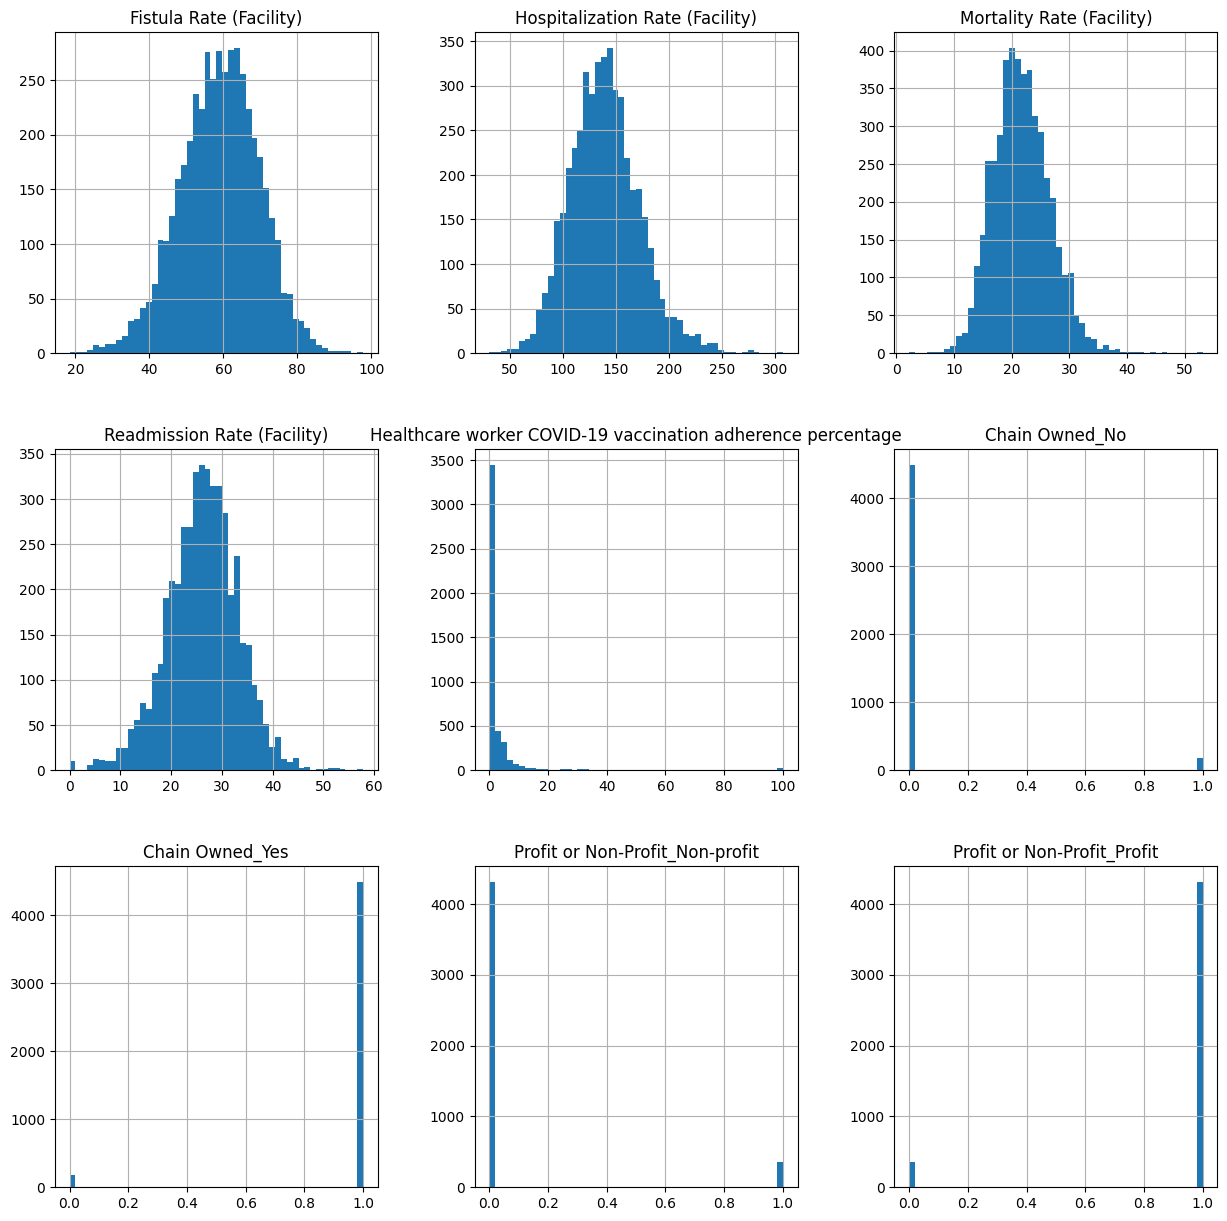

In [23]:
# display the distribution of the features
X.hist(bins=50, figsize=(15, 15))
plt.show()

In [24]:
# the covid-19 vaccination data is skewed, as are the categories for profit/non-profit and chain owned yes/no
# one potential fix for the categories would be a sampling technique like SMOTE, but I did not do that here.

In [25]:
# train test split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 4: modeling

In [26]:
# determine a baseline against which to measure success:

# instantiate DummyRegressor() model as baseline
dum_reg = DummyRegressor()

# fit baseline
dum_reg.fit(X_train, y_train)

# predict baseline
dum_preds = dum_reg.predict(X_test)


In [27]:
# score baseline 
dum_r2 = dum_reg.score(X_test, y_test)
dum_mse = mean_squared_error(y_test, dum_preds)
print(f'The baseline model R2 is {round(dum_r2,3)} and the MSE is {round(dum_mse,3)}')

The baseline model R2 is -0.0 and the MSE is 1.149


In [28]:
# create a linear model and train it 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# make predictions on train and test data 
linear_predictions_train = linear_model.predict(X_train)
linear_predictions_test = linear_model.predict(X_test)

#### Business Question: Can we model facility ratings using ownership info and numeric data like mortality rate?   
by creating a model using ownership related features as well as selected numeric features regarding patient outcomes. By showing that this model outperforms a baseline model, it does appear that we can predict dialysis facility ratings to a certain degree based on patient outcomes and ownership data.  

if our business wants to help facilities improve their ratings, we can recommend potential areas to improve using our understanding of the created model.  we can also use the model to predict the rating of new facilities based on their expected patient outcomes and ownership structure. 

## Step 5: evaluation

In [29]:
# check results for signs of overfitting:
mse_train = mean_squared_error(y_train, linear_predictions_train)
print(f'train mse: {round(mse_train,3)}')
mse_test = mean_squared_error(y_test, linear_predictions_test)
print(f'test mse: {round(mse_test,3)}')

# note that MSE does slightly increase, but not significantly:
print(f'test mse is {round(100*((mse_test/mse_train)),1)}% times the size of train mse')

train mse: 0.531
test mse: 0.551
test mse is 103.9% times the size of train mse


In [30]:
# check r^2 , how well does this model explain the data
r2 = r2_score(y_test, linear_predictions_test)
print(f"The r^2 value is {round(r2,3)}")

The r^2 value is 0.52


In [31]:
# confirm our model outperformed baseline:
print(f'the difference in Test MSE (linear model - baseline) = {round(abs(mse_test) - abs(dum_mse),3)}')
print(f'the difference in Test r^2 (linear model - baseline) = {round(r2 - dum_r2,3)}')

# the linear model has a lower test MSE than the baseline, meaning it makes better predictions on average
# the linear model has a higher r^2 , indicating it does a better job of explaining the variance in the data

the difference in Test MSE (linear model - baseline) = -0.598
the difference in Test r^2 (linear model - baseline) = 0.52


#### Business Question: What does our model tell us is most important for a high rating?   
the model coefficients below can tell us which predictors were most impactful on the model prediction. 
in fact our model suggests that being chain owned is the single most impactful predictor, while patient outcomes like fistula rate, mortality rate, and readmission rate provide some predictive power.  Interestingly, fistula rate is positively associated with ratings, meaning that higher fistula rates in a facility are associated with better ratings.  further discussion with folks in the industry might shed more light on that, as it seems paradoxical to me.

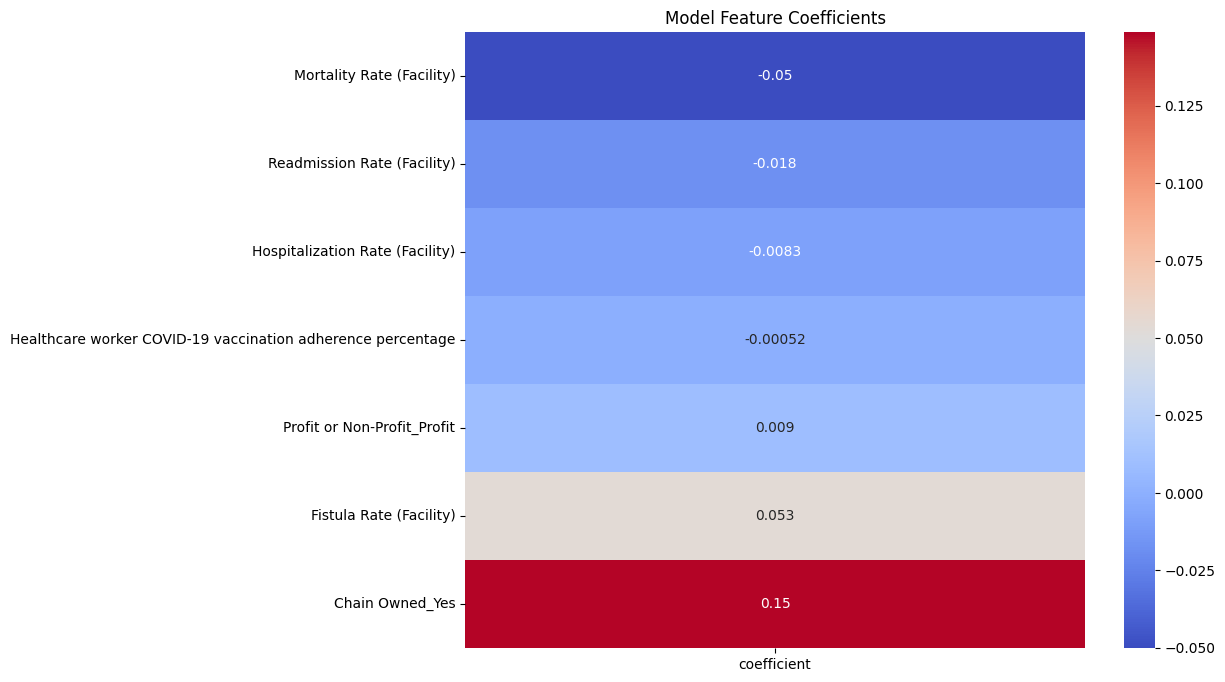

In [37]:
# what do the model coefficients tell us? 
model_features = pd.DataFrame({'coefficient': linear_model.coef_}, index=X.columns)

model_features = model_features.sort_values('coefficient')
model_features = model_features.drop(['Chain Owned_No', 'Profit or Non-Profit_Non-profit'])
plt.figure(figsize=(10, 8))
sns.heatmap(model_features, annot=True, cmap='coolwarm')
plt.title('Model Feature Coefficients')
plt.show()

## Step 6: deployment
#### note: deployment is not feasible for this project, instead below I have included some insights gathered from the model

In [38]:
# predicting the rating of existing facilities
for i in range(5):
    print(f'facility data: \n{X_test.loc[y_test.index[i]]} \
    \n\nrating prediction: {linear_predictions_test[i]} \
    \ntrue rating: {y_test.values[i]}\n\n\n')



facility data: 
Fistula Rate (Facility)                                         38.8
Hospitalization Rate (Facility)                                186.4
Mortality Rate (Facility)                                       20.0
Readmission Rate (Facility)                                     33.2
Healthcare worker COVID-19 vaccination adherence percentage      0.0
Chain Owned_No                                                   0.0
Chain Owned_Yes                                                  1.0
Profit or Non-Profit_Non-profit                                  1.0
Profit or Non-Profit_Profit                                      0.0
Name: 2729, dtype: float64     

rating prediction: 1.399633773317708     
true rating: 1.0



facility data: 
Fistula Rate (Facility)                                        51.9
Hospitalization Rate (Facility)                                87.3
Mortality Rate (Facility)                                      26.7
Readmission Rate (Facility)                     

In [39]:
# predicting how the rating of that facility might change if patient outcomes change: 
# predicting the rating of a new facility (numbers made up)
changed_facility_data = {
     'Fistula Rate (Facility)': [45], 
     'Hospitalization Rate (Facility)': [174.1], 
     'Mortality Rate (Facility)': [17.6],
     'Readmission Rate (Facility)': [28.1], 
     'Healthcare worker COVID-19 vaccination adherence percentage': [0], 
     'Chain Owned_No': [0], 
     'Chain Owned_Yes': [1], 
     'Profit or Non-Profit_Non-profit': [0], 
     'Profit or Non-Profit_Profit': [1]}

changed_facility_df = pd.DataFrame(changed_facility_data)


linear_model.predict(changed_facility_df)
# so if this facility was able to increase their fistula rate from 32 to 45
# that might push their rating to 2 stars instead of 1

array([2.06284401])

In [40]:
# predicting the rating of a new facility (numbers made up)
new_facility_data = {
     'Fistula Rate (Facility)': [80], 
     'Hospitalization Rate (Facility)': [150], 
     'Mortality Rate (Facility)': [20],
     'Readmission Rate (Facility)': [20], 
     'Healthcare worker COVID-19 vaccination adherence percentage': [5], 
     'Chain Owned_No': [0], 
     'Chain Owned_Yes': [1], 
     'Profit or Non-Profit_Non-profit': [0], 
     'Profit or Non-Profit_Profit': [1]}

new_facility_df = pd.DataFrame(new_facility_data)


linear_model.predict(new_facility_df)

# modeling to understand what the expected rating of a new facility will be
# based on the expected patient outcomes for that new facility

array([4.15062332])

In [41]:
# another way to view things:
# if our business wanted to open a new facility with a 4 star rating, these would be some patient outcomes to target

## Conclusion
### based on the magnitude and direction of the coefficients, results suggest that:
- covid-19 vaccination adherence was associated with only slightly worse star ratings (very small negative model coefficient) 
- the facility being part of a chain was associated with better ratings! (I did not expect this)
- in general being for-profit was associated with better ratings (I did not expect this either)
- higher rates of mortality, hospitalization, and readmission were all associated with lower scores, which is helpful because it means the scores will give patients some insight into health outcomes from facilities
- interesting that fistula rate is positively associated with rating... I could not tell from the data dictionary what exactly the fistula rate meant, so this would be a time for discussion with a subject matter expert! perhaps fistula are less serious than other issues dealt with by clinics, so more fistual = fewer (more serious) other patients?

- methodology data link is dead as of last check on 2025-06-04, so cannot confirm how these features are calculated:
     https://dialysisdata.org/sites/default/files/content/dfccmethodology
     
### potential confounds
- the biggest potential confounds to me are imbalanced samples - non-profit and non-chain facilities are seriously underrepresented, and I did not use a sampling technique to try and control for this, so as a result the model created may have some bias.  Future work could focus on controlling for this , but it was outside the scope of my current focus